# CLT with dice

You can view these sheets on github, but to modify them, you'll need to a version of jupyter. How to install it is explained here: http://jupyter.readthedocs.io/en/latest/install.html.
If you want to use the functions defined below to generate your own distributions, you need to compile them first. Easiest done by clicking (once have opened this as jupyter notebook): Kernel -> Restart & Run All. (Alternatively, you can use the >| button to click your way through, but you need to start from the beginning to have access to all functions defined on this sheet). Have fun!

Let's generate a few distributions and calculate the mean, mode, median for each.
Start by importing the relevant libraries

In [1]:
from math import *
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

Let's generate a distribution we would get from throwing a (fair) die

In [2]:
def throwOneDie(HowOften):
    flatRandom = np.random.random(HowOften) 
    #turn it into integers from 1 to 6:
    return [int(x*6)+1 for x in flatRandom]

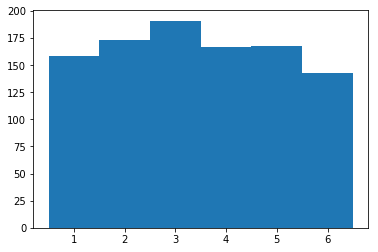

In [3]:
oneDieRandom = throwOneDie(1000)
h=plt.hist(oneDieRandom, 6, range=(0.5, 6.5)) # make histogram
plt.show()

Calulate arithmetic mean and std-dev

In [4]:
def meanAndStdev(sample):
    sum=0
    sumsq=0
    for x in sample:
        sum   += x
        sumsq += x**2
    N = len(sample)
    mean   = sum/N
    meansq = sumsq/N
    Variance = meansq - mean**2
    StandardDeviation = sqrt(Variance)
    return mean, Variance, StandardDeviation

In [5]:
mu, variance, sigma = meanAndStdev(oneDieRandom)
print("mean = ", mu, ", sigma = ", sigma)

mean =  3.443 , sigma =  1.6537082572207225


Now let's throw multiple dice

In [6]:
def sumMultiRandom(PDF, NDice=10, Nevents=1000): 
    # we'll write it such that we can give it various PDFs, not just dice
    # For dice we'll pass throwOneDie as first argument
    randomNumbers=PDF(Nevents)
    if NDice == 1: return randomNumbers
    
    for counter in range(NDice-1):
        newRandomNumbers = PDF(Nevents)
        randomNumbers = [x + y for x, y in zip(randomNumbers, newRandomNumbers)]
    return randomNumbers

Now let's put it all together in one neat function

In [7]:
def doAll(PDF, NDice=1, Nevents=1000, histoBins=-1, histoMin=999, histoMax=-999):
    RandomDice = sumMultiRandom(PDF, NDice=NDice, Nevents=Nevents)

    mini=histoMin
    maxi=histoMax
    if(histoMax < histoMin):
        mini=NDice-0.5
        maxi=NDice*6+0.5
        if mini > min(RandomDice) : mini = min(RandomDice) - 0.5
        if maxi < max(RandomDice) : maxi = max(RandomDice) + 0.5
    bins=int(maxi-mini)
    if histoBins > 0 : bins=histoBins

    h=plt.hist(RandomDice, bins, range=(mini, maxi)) # make histogram
    plt.show()
    mu, var, sigma = meanAndStdev(RandomDice)
    print("For ", NDice, " dice, thrown ", Nevents, " times:")
    print("mean = ", mu, ", variance = ", var, ", sigma = ", sigma)

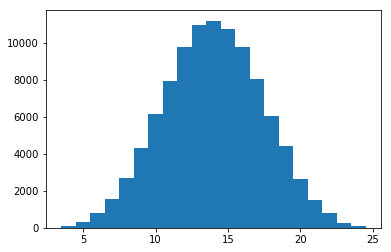

For  4  dice, thrown  100000  times:
mean =  13.99632 , variance =  11.638746457599979 , sigma =  3.4115607070078613


In [8]:
doAll(throwOneDie, 4, 100000)

Let's try it out for a few distributions and see if mean and variance are both proportional to the number of dice, as expected.

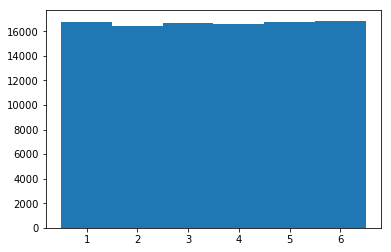

For  1  dice, thrown  100000  times:
mean =  3.50785 , variance =  2.928358377500002 , sigma =  1.7112446866243303


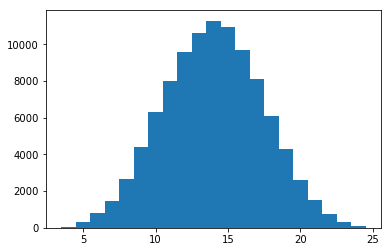

For  4  dice, thrown  100000  times:
mean =  13.99944 , variance =  11.621059686400002 , sigma =  3.408967539651852


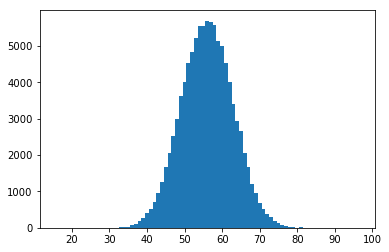

For  16  dice, thrown  100000  times:
mean =  55.99607 , variance =  46.92515455509965 , sigma =  6.850193760405588


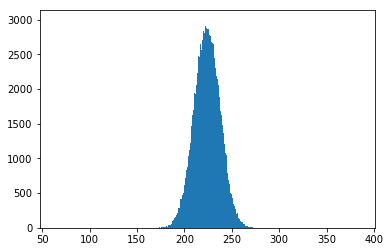

For  64  dice, thrown  100000  times:
mean =  223.95752 , variance =  186.16267544960283 , sigma =  13.644144364876928


In [9]:
doAll(throwOneDie, 1, 100000)
doAll(throwOneDie, 4, 100000)
doAll(throwOneDie, 16, 100000)
doAll(throwOneDie, 64, 100000)

Does it also work with other distributions? Let's try a triangular shaped one

In [10]:
def throwTriangle(HowOften):
    flat = np.random.random(HowOften) 
    triangleRandom = [sqrt(x) for x in flat] ## magic coordinate trafo
    #turn it into integers from 1 to 6: (not really needed, but why not)
    return [int(x*6)+1 for x in triangleRandom]

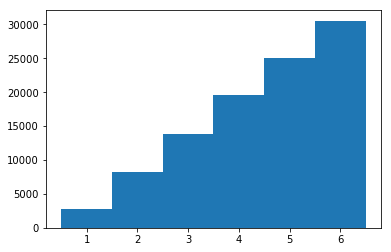

For  1  dice, thrown  100000  times:
mean =  4.47399 , variance =  1.9659034798999997 , sigma =  1.4021068004613628


In [11]:
doAll(throwTriangle, 1, 100000)

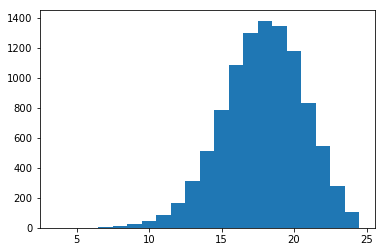

For  4  dice, thrown  10000  times:
mean =  17.8649 , variance =  7.820047990000035 , sigma =  2.7964348714032363


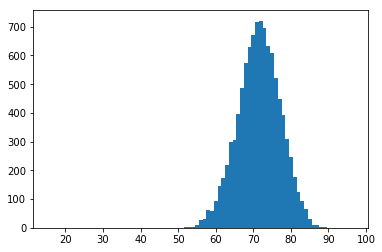

For  16  dice, thrown  10000  times:
mean =  71.5038 , variance =  31.891385560000344 , sigma =  5.647245838459695


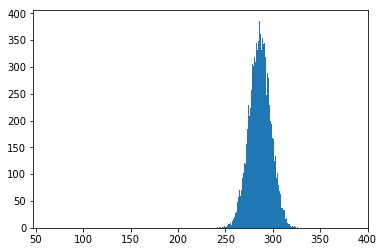

For  64  dice, thrown  10000  times:
mean =  286.3215 , variance =  126.2117377499817 , sigma =  11.234399750319627


In [12]:
doAll(throwTriangle, 4, 10000)
doAll(throwTriangle, 16, 10000)
doAll(throwTriangle, 64, 10000)

So it also works for a distribution as asymmetric and the triangle. Of course it also works for continuous distributions. Let's try an exponential

In [13]:
def expo(Nevents):
    expoSample = np.random.exponential(scale = 1, size=Nevents)
    return expoSample

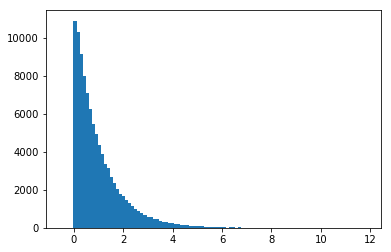

For  1  dice, thrown  100000  times:
mean =  1.00433088159 , variance =  1.0084585705 , sigma =  1.0042203794476543


In [14]:
doAll(expo, 1, 100000, 100)

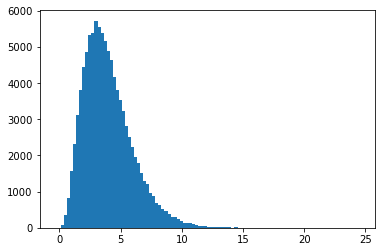

For  4  dice, thrown  100000  times:
mean =  4.00053865844 , variance =  3.9817130978 , sigma =  1.995423037303927


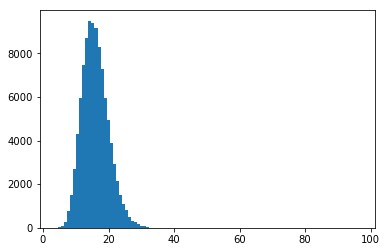

For  16  dice, thrown  100000  times:
mean =  15.9928336496 , variance =  15.9293817292 , sigma =  3.9911629544789897


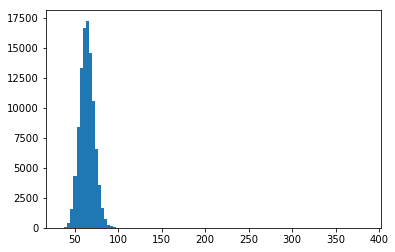

For  64  dice, thrown  100000  times:
mean =  64.0159752925 , variance =  64.5642975269 , sigma =  8.035191194169851


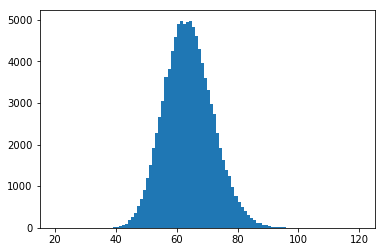

For  64  dice, thrown  100000  times:
mean =  63.9593466557 , variance =  63.6096772749 , sigma =  7.975567520555637


In [15]:
doAll(expo, 4, 100000, 100)
doAll(expo, 16, 100000, 100)
doAll(expo, 64, 100000, 100)
doAll(expo, 64, 100000, 100, 20, 120) # zoom in a bit